<a href="https://colab.research.google.com/github/Dimonfordont/DS_course/blob/main/Basics/Models/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия


Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные.

In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7
  print(y)
  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, y, X_train, y_train, X_test, y_test

In [ ]:
X, y, X_train, y_train, X_test, y_test = generate_data(100)

[-57.         -55.98989899 -54.97979798 -53.96969697 -52.95959596
 -51.94949495 -50.93939394 -49.92929293 -48.91919192 -47.90909091
 -46.8989899  -45.88888889 -44.87878788 -43.86868687 -42.85858586
 -41.84848485 -40.83838384 -39.82828283 -38.81818182 -37.80808081
 -36.7979798  -35.78787879 -34.77777778 -33.76767677 -32.75757576
 -31.74747475 -30.73737374 -29.72727273 -28.71717172 -27.70707071
 -26.6969697  -25.68686869 -24.67676768 -23.66666667 -22.65656566
 -21.64646465 -20.63636364 -19.62626263 -18.61616162 -17.60606061
 -16.5959596  -15.58585859 -14.57575758 -13.56565657 -12.55555556
 -11.54545455 -10.53535354  -9.52525253  -8.51515152  -7.50505051
  -6.49494949  -5.48484848  -4.47474747  -3.46464646  -2.45454545
  -1.44444444  -0.43434343   0.57575758   1.58585859   2.5959596
   3.60606061   4.61616162   5.62626263   6.63636364   7.64646465
   8.65656566   9.66666667  10.67676768  11.68686869  12.6969697
  13.70707071  14.71717172  15.72727273  16.73737374  17.74747475
  18.7575757

Визуализируем данные, используя библиотеку matplotlib.

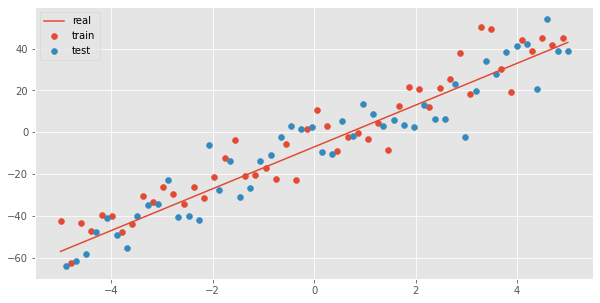

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Поработаем с простейшим одномерным случаем регрессии. Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w = model.coef_
b = model.intercept_

In [ ]:
w, b

(array([9.93856852]), -3.404193134581374)

In [ ]:
X[1::2]

array([-4.8989899 , -4.6969697 , -4.49494949, -4.29292929, -4.09090909,
       -3.88888889, -3.68686869, -3.48484848, -3.28282828, -3.08080808,
       -2.87878788, -2.67676768, -2.47474747, -2.27272727, -2.07070707,
       -1.86868687, -1.66666667, -1.46464646, -1.26262626, -1.06060606,
       -0.85858586, -0.65656566, -0.45454545, -0.25252525, -0.05050505,
        0.15151515,  0.35353535,  0.55555556,  0.75757576,  0.95959596,
        1.16161616,  1.36363636,  1.56565657,  1.76767677,  1.96969697,
        2.17171717,  2.37373737,  2.57575758,  2.77777778,  2.97979798,
        3.18181818,  3.38383838,  3.58585859,  3.78787879,  3.98989899,
        4.19191919,  4.39393939,  4.5959596 ,  4.7979798 ,  5.        ])

Визуализируем предсказания.

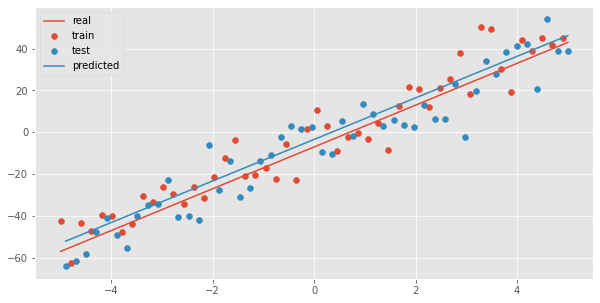

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  73.67897200481738
Test MSE:  99.28116614801891


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  6.766838502737872
Test MAE:  8.222371993782488


# Реальный датасет

Будем работать с датасетом Boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000.
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
#from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX','PTRATIO', 'B','LSTAT', 'MEDV']# 2,3,4,5,6,7,8,9,0,0]
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

raw_df.head()

ValueError: ignored

In [ ]:
h#ouse_data = load_boston()

In [ ]:
X = data#pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = target# = house_data['target']

In [ ]:
X['my_feature'] = X['CRIM'] * X['ZN']
X

IndexError: ignored

Визуализируем распределения признаков в датасете

In [ ]:
_ = X.hist(X.columns, figsize=(10, 10))

Посмотрим на то, как скоррелированы данные

In [ ]:
import seaborn as sns

sns.heatmap(X.corr())

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
y_train.shape, y_test.shape

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Визуализируем получившиеся веса

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

## Ridge & Lasso

Попытаемся исправить проблему переобучения для линейной регрессии. Замечено, что линейная регрессия переобучается, когда вектор весов имеет очень большие значения. Постараемся избежать этого, прибавив к функции потерь дополнительное слагаемое.

### Ridge regression:
$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w||^2 \rightarrow \min_{w}.$$

### Lasso regression:

$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w|| \rightarrow \min_{w}.$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.figure(figsize=(15,8))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

In [ ]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.figure(figsize=(15,8))
plt.plot(alphas, weights.T)
plt.grid()
plt.show()

# Предсказание отклика на маркетинговую кампанию

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача --- предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Какие признаки вы бы использовали?

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
# Считаем данные
data = pd.read_csv('bank.csv', sep=';')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [ ]:
y.mean()

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [ ]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

Разобьем выборку на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейную регрессию.

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_predicted = model_linear.predict(X_test)


Наконец, посчитаем метрики

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))